# Phân tích Dữ liệu (EDA)

## Covid19 Global Excess Deaths

Link: https://www.kaggle.com/datasets/joebeachcapital/covid19-global-excess-deaths-daily-updates

Bộ dữ liệu "Covid19 Global Excess Deaths (daily updates)" bao gồm thông tin về số lượng tử vong vượt quá mức bình thường trong các quốc gia và vùng lãnh thổ khác nhau trên thế giới. Đây là một chỉ số đo lường sự chênh lệch giữa số lượng tử vong thực tế và số lượng tử vong dự kiến trong một khoảng thời gian cụ thể.

Dữ liệu được thu thập từ nhiều nguồn khác nhau như các báo cáo chính thức từ các cơ quan y tế và tổ chức quốc tế. Nó cung cấp thông tin chi tiết về các quốc gia và vùng lãnh thổ khác nhau, cho phép người dùng nghiên cứu sự biến đổi theo thời gian và so sánh giữa các địa điểm khác nhau.

Một số tập dữ liệu chính của bộ dữ liệu này:

* export_country: tập dữ liệu này cung cấp thông tin về số lượng tử vong vượt quá mức bình thường theo quốc gia trong các ngày cụ thể.

* export_world: Đây là tập dữ liệu chứa thông tin tổng hợp về số lượng tử vong vượt quá mức bình thường trên toàn cầu.

* export_regions: tập dữ liệu này tương tự như bộ dữ liệu trên, nhưng phân theo vùng lãnh thổ chứ không phải theo quốc gia. Nó cung cấp thông tin về số lượng tử vong vượt quá mức bình thường theo vùng lãnh thổ, cho phép theo dõi tình hình tử vong trong các khu vực.




## Tổng quan về bộ dữ liệu

Bộ dữ liệu phân tích:

Bộ dữ liệu "export_country" là bộ dữ liệu chi tiết nhất để phân tích và nghiên cứu về tác động của dịch Covid-19 ảnh hướng như thế nào với đối với tình hình tử vong ở các quốc gia khác nhau.

Chúng ta sẽ sử dụng thông tin trong tập dữ liệu này, để có thể thực hiện các phân tích về mức độ tác động của dịch Covid-19 đối với số lượng tử vong vượt quá mức bình thường.

### Khai báo thư viện và dữ liệu

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive/')
os.chdir('./drive/MyDrive/Of Course/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df= pd.read_csv('export_country.csv')
df= pd.DataFrame(df)

## Đọc và tìm hiểu về dữ liệu

In [ ]:
#In 3 quan sát đầu tiên của bảng dữ liệu.
df.head(3)

,iso3c,date,population,estimated_daily_excess_deaths,estimated_daily_excess_deaths_ci_95_top,estimated_daily_excess_deaths_ci_90_top,estimated_daily_excess_deaths_ci_50_top,estimated_daily_excess_deaths_ci_50_bot,estimated_daily_excess_deaths_ci_90_bot,estimated_daily_excess_deaths_ci_95_bot,estimated_daily_excess_deaths_raw_estimate,daily_excess_deaths,daily_covid_deaths
0,ABW,2020-01-01,106459,0.000000,0.078784,0.048452,0.018368,-0.014388,-0.048685,-0.058070,-0.001593,0.0,0.0
1,AFG,2020-01-01,41128772,-2.679549,17.497665,11.426295,4.968848,-2.733654,-9.846408,-16.672976,-2.679549,NaN,0.0
2,AGO,2020-01-01,35588996,35.069478,65.499067,48.815249,35.069478,1.409343,-4.071577,-5.923728,35.069478,NaN,0.0


Tập dữ liệu "export_country" bao gồm các thông tin sau:

iso3c: Mã ISO 3 ký tự đại diện cho quốc gia. Ví dụ: ABW cho Aruba, AFG cho Afghanistan, AGO cho Angola, vv.

date: Ngày tháng năm, đại diện cho thời điểm ghi nhận dữ liệu.

population: Dân số của quốc gia.

estimated_daily_excess_deaths: Số lượng tử vong vượt quá mức bình thường ước tính hàng ngày.

estimated_daily_excess_deaths_ci_95_top: Giá trị trên của khoảng tin cậy 95% cho ước tính số lượng tử vong vượt quá mức bình thường hàng ngày.

estimated_daily_excess_deaths_ci_95_bot: Giá trị dưới của khoảng tin cậy 95% cho ước tính số lượng tử vong vượt quá mức bình thường hàng ngày.

estimated_daily_excess_deaths_ci_90_top: Giá trị trên của khoảng tin cậy 90% cho ước tính số lượng tử vong vượt quá mức bình thường hàng ngày.

estimated_daily_excess_deaths_ci_90_bot: Giá trị dưới của khoảng tin cậy 90% cho ước tính số lượng tử vong vượt quá mức bình thường hàng ngày.

estimated_daily_excess_deaths_ci_50_top: Giá trị trên của khoảng tin cậy 50% cho ước tính số lượng tử vong vượt quá mức bình thường hàng ngày.

estimated_daily_excess_deaths_ci_50_bot: Giá trị dưới của khoảng tin cậy 50% cho ước tính số lượng tử vong vượt quá mức bình thường hàng ngày.

estimated_daily_excess_deaths_raw_estimate: Ước tính số lượng tử vong vượt quá mức bình thường hàng ngày.

daily_excess_deaths: Số lượng tử vong vượt quá mức bình thường hàng ngày.

daily_covid_deaths: Số lượng tử vong do Covid-19 hàng ngày.

Dữ liệu được tổng hợp theo hàng tuần mỗi 7 ngày.

Số tuần đã thu thập dữ liệu

In [ ]:
# Đếm số ngày duy nhất trong cột 'date'
total_unique_days = df['date'].nunique()

# Hiển thị tổng số ngày
print("Tổng số ngày trong bộ dữ liệu là:", total_unique_days)

Tổng số ngày trong bộ dữ liệu là: 204


Số các quốc gia

In [ ]:
# Lấy tất cả các quốc gia ban đầu
unique_countries = df['iso3c'].unique()

# Hiển thị danh sách các quốc gia
# print("Tất cả các quốc gia ban đầu:")
# print(unique_countries)
len(unique_countries)

236

Các đại lượng thống kê mô tả

In [ ]:
df.describe()

,population,estimated_daily_excess_deaths,estimated_daily_excess_deaths_ci_95_top,estimated_daily_excess_deaths_ci_90_top,estimated_daily_excess_deaths_ci_50_top,estimated_daily_excess_deaths_ci_50_bot,estimated_daily_excess_deaths_ci_90_bot,estimated_daily_excess_deaths_ci_95_bot,estimated_daily_excess_deaths_raw_estimate,daily_excess_deaths,daily_covid_deaths
count,4.814400e+04,48144.000000,48144.000000,48144.000000,48144.000000,48144.000000,48144.000000,48144.000000,48144.000000,18703.000000,47281.000000
mean,3.369158e+07,81.309961,180.611919,156.440583,105.174693,44.968123,20.916530,11.996984,81.064235,74.766305,21.070569
std,1.359509e+08,623.827826,1101.261580,957.444863,687.544834,347.359113,251.508907,231.364333,620.837685,273.399592,125.353989
min,4.700000e+01,-2184.699190,-232.984833,-332.348963,-941.802351,-2186.587811,-3646.760614,-4162.684812,-1421.208039,-2184.699190,0.000000
25%,4.029042e+05,0.000000,1.045943,0.835419,0.284673,-0.183486,-3.174201,-5.845974,0.002455,-0.111717,0.000000
50%,5.462034e+06,2.331660,15.481541,12.902090,6.678391,0.369618,-0.094867,-0.292377,2.676129,5.165320,0.143000
75%,2.190542e+07,29.873203,80.063411,69.013868,43.891482,13.020853,3.215542,0.944736,29.774490,38.954775,3.143000
max,1.425887e+09,45304.916465,59850.513433,50711.059352,45304.916465,20246.461819,14871.834122,13697.898389,45304.916465,4067.524873,4190.000000


Top 5 quốc gia có số ca tử vong do COVID-19 nhiều nhất

In [ ]:
# Lọc các dòng có thông tin về COVID-19
covid_data = df[['iso3c', 'date', 'daily_covid_deaths']].dropna()

# Tính tổng số ca tử vong cho mỗi quốc gia
total_covid_deaths = covid_data.groupby('iso3c')['daily_covid_deaths'].sum().reset_index()

# Tìm top 5 quốc gia có số ca tử vong nhiều nhất
top_countries = total_covid_deaths.nlargest(5, 'daily_covid_deaths')

print("Top 5 quốc gia có số ca tử vong do COVID-19 nhiều nhất:")
print(top_countries)

Top 5 quốc gia có số ca tử vong do COVID-19 nhiều nhất:
    iso3c  daily_covid_deaths
217   USA          161369.863
28    BRA          100665.570
94    IND           76184.861
176   RUS           57179.431
131   MEX           47821.708


Top 5 quốc gia có số ca tử vong vượt quá mức bình thường nhiều nhất

In [ ]:
# Lọc các dòng có thông tin về COVID-19
covid_data = df[['iso3c', 'date', 'daily_excess_deaths']].dropna()

# Tính tổng số ca tử vong cho mỗi quốc gia
total_covid_deaths = covid_data.groupby('iso3c')['daily_excess_deaths'].sum().reset_index()

# Tìm top 5 quốc gia có số ca tử vong nhiều nhất
top_countries = total_covid_deaths.nlargest(5, 'daily_excess_deaths')

print("Top 5 quốc gia có số ca tử vong vượt quá mức bình thường nhiều nhất:")
print(top_countries)

Top 5 quốc gia có số ca tử vong vượt quá mức bình thường nhiều nhất:
    iso3c  daily_excess_deaths
112   USA        194513.983495
95    RUS        166005.621286
16    BRA        130553.321681
73    MEX         93984.802970
35    EGY         50935.858010


Năm có số ca tử vong do COVID-19 nhiều nhất

In [ ]:
# Lọc các dòng có thông tin về COVID-19
covid_data = df[['date', 'daily_covid_deaths']].dropna()

# Chuyển đổi cột 'date' sang kiểu datetime
covid_data['date'] = pd.to_datetime(covid_data['date'])

# Trích xuất năm từ cột 'date'
covid_data['year'] = covid_data['date'].dt.year

# Tính tổng số ca tử vong cho mỗi năm
total_deaths_by_year = covid_data.groupby('year')['daily_covid_deaths'].sum().reset_index()

# Tìm năm có số ca tử vong nhiều nhất
year_with_most_deaths = total_deaths_by_year.loc[total_deaths_by_year['daily_covid_deaths'].idxmax()]

print("Năm có số ca tử vong do COVID-19 nhiều nhất:")
print(year_with_most_deaths)

Năm có số ca tử vong do COVID-19 nhiều nhất:
year                    2021.000
daily_covid_deaths    506444.537
Name: 1, dtype: float64


Quốc gia ghi nhận có số ca tử vong hàng ngày do COVID-19 đầu tiên trên thế giới

In [ ]:
# Lọc các dòng có thông tin về COVID-19
covid_data = df[['iso3c', 'date', 'daily_covid_deaths']].dropna()

# Chuyển đổi cột 'date' sang kiểu datetime
covid_data['date'] = pd.to_datetime(covid_data['date'])

# Lọc các dòng có số ca tử vong lớn hơn 0
covid_data = covid_data[covid_data['daily_covid_deaths'] > 0]

# Sắp xếp dữ liệu theo 'date'
covid_data.sort_values('date', inplace=True)

# Lấy dòng đầu tiên (đầu tiên trên thế giới)
first_death_row = covid_data.iloc[0]

# In thông tin về quốc gia có số ca tử vong đầu tiên
print("Quốc gia ghi nhận có số ca tử vong hàng ngày do COVID-19 đầu tiên trên thế giới:")
print(first_death_row[['iso3c', 'date', 'daily_covid_deaths']])

Quốc gia ghi nhận có số ca tử vong hàng ngày do COVID-19 đầu tiên trên thế giới:
iso3c                                 DEU
date                  2020-01-06 00:00:00
daily_covid_deaths                   0.75
Name: 288, dtype: object


## Phát hiện và xử lý giá trị thiếu và giá trị ngoại lệ

### Kiểm tra giá trị thiếu

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48144 entries, 0 to 48143
Data columns (total 13 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   iso3c                                       48144 non-null  object 
 1   date                                        48144 non-null  object 
 2   population                                  48144 non-null  int64  
 3   estimated_daily_excess_deaths               48144 non-null  float64
 4   estimated_daily_excess_deaths_ci_95_top     48144 non-null  float64
 5   estimated_daily_excess_deaths_ci_90_top     48144 non-null  float64
 6   estimated_daily_excess_deaths_ci_50_top     48144 non-null  float64
 7   estimated_daily_excess_deaths_ci_50_bot     48144 non-null  float64
 8   estimated_daily_excess_deaths_ci_90_bot     48144 non-null  float64
 9   estimated_daily_excess_deaths_ci_95_bot     48144 non-null  float64
 10  estimated_

Có thể thấy rằng cột "daily_excess_deaths" (cột 11) và "daily_covid_deaths" (cột 12) có số lượng dữ liệu không-null (non-null count) khác nhau so với các cột khác trong bảng dữ liệu. Điều này cho thấy rằng có một số dòng trong bảng dữ liệu không có giá trị cho tham số này.

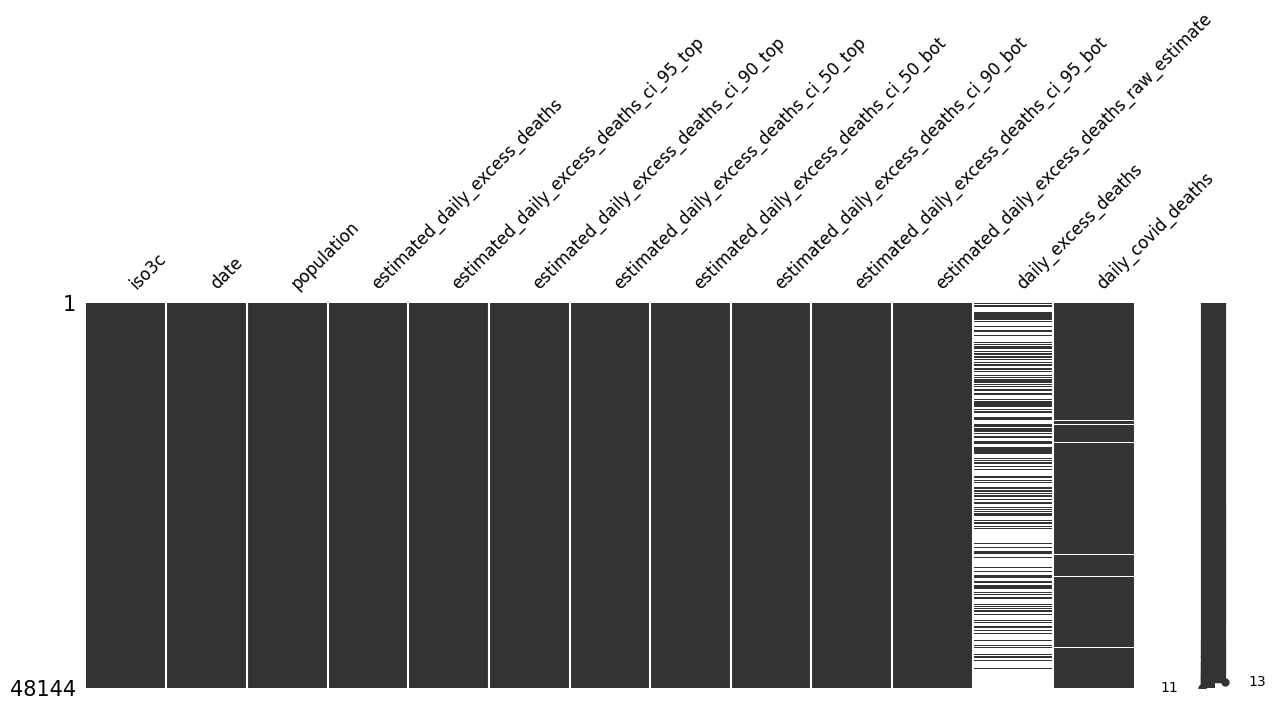

In [ ]:
import missingno as mno
fig = mno.matrix(df, figsize = (15,5), fontsize=12, color=(0.2, 0.2, 0.2))
#sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
null_counts_11 = df['daily_excess_deaths'].isnull().sum()
null_percentage_11 = null_counts_11 / len(df) * 100
print("Number of null values in 'daily_excess_deaths':", null_counts_11)
print("Percentage of null values in 'daily_excess_deaths':", null_percentage_11)

null_counts_12 = df['daily_covid_deaths'].isnull().sum()
null_percentage_12 = null_counts_12 / len(df) * 100
print("Number of null values in 'daily_covid_deaths':", null_counts_12)
print("Percentage of null values in 'daily_covid_deaths':", null_percentage_12)

Number of null values in 'daily_excess_deaths': 29441
Percentage of null values in 'daily_excess_deaths': 61.15196078431373
Number of null values in 'daily_covid_deaths': 863
Percentage of null values in 'daily_covid_deaths': 1.7925390495181124


Với những dữ liệu bị thiếu ta có thể thay thế bằng các giá trị khác như 0, giá trị trung bình/trung vị,...

Tuy nhiên,tỷ lệ null của cột daily_excess_deaths rất lớn nên ta không thể thay thế bằng giá trị cảm tính cho chúng vì điều đó có thể sẽ làm thay đổi những đặc trưng quan trọng của dữ liệu gốc.

Và tỷ lệ null của cột daily_covid_deaths khá thấp nên khi xóa bỏ cũng không ảnh hưởng nhiều đến dữ liệu. Do đó, sẽ xóa đi những dữ liệu bị khuyết thiếu này.

In [ ]:
df= pd.read_csv('export_country.csv')
df= pd.DataFrame(df)

In [ ]:
# Xóa hết các dòng có giá trị null trong cột 'daily_excess_deaths'
df.dropna(subset=['daily_excess_deaths'], inplace=True)
df.dropna(subset=['daily_covid_deaths'], inplace=True)

### Kiểm tra trùng, lặp dữ liệu

In [ ]:
df[df.duplicated(keep='first')]

,iso3c,date,population,estimated_daily_excess_deaths,estimated_daily_excess_deaths_ci_95_top,estimated_daily_excess_deaths_ci_90_top,estimated_daily_excess_deaths_ci_50_top,estimated_daily_excess_deaths_ci_50_bot,estimated_daily_excess_deaths_ci_90_bot,estimated_daily_excess_deaths_ci_95_bot,estimated_daily_excess_deaths_raw_estimate,daily_excess_deaths,daily_covid_deaths


In [ ]:
duplicates_all_columns = df[df.duplicated(['population', 'daily_excess_deaths', 'daily_covid_deaths','date'], keep='first')]
duplicates_all_columns

,iso3c,date,population,estimated_daily_excess_deaths,estimated_daily_excess_deaths_ci_95_top,estimated_daily_excess_deaths_ci_90_top,estimated_daily_excess_deaths_ci_50_top,estimated_daily_excess_deaths_ci_50_bot,estimated_daily_excess_deaths_ci_90_bot,estimated_daily_excess_deaths_ci_95_bot,estimated_daily_excess_deaths_raw_estimate,daily_excess_deaths,daily_covid_deaths


### Kiểm tra ngoại lai

 Dữ liệu của chúng ta là tổng hợp từ nhiều quốc gia và không thuộc về một đối tượng cụ thể, do đó nó không có phân phối đặc trưng. Có sự chênh lệch lớn về dân số, ca bệnh xảy ra giữa các nước dẫn đến chỉ số IQR không thể đại diện để đánh giá được giá trị ngoại lai. Do đó, giá trị vượt ngưỡng IQR không phải là ngoại lai.

# Phần 2: Mô hình Hóa và Xử lý Dữ liệu

## Mô hình Random Forest

Sử dụng mô hình Random Forest để dự đoán số lượng tử vong vượt quá mức bình thường hàng ngày( daily_excess_deaths)

Với đặc trưng của bộ dữ liệu này là tổng hợp từ nhiều quốc gia và không thuộc về một đối tượng cụ thể, việc sử dụng mô hình xử lý chuỗi thời gian có thể không phải là lựa chọn phù hợp nhất. Vì các mô hình xử lý chuỗi thời gian thường được thiết kế chủ yếu để mô hình hóa và dự đoán chuỗi thời gian của một biến liên tục theo thời gian.

Trong trường hợp tổng hợp từ nhiều quốc gia, mô hình học máy như Random Forest sẽ phù hợp hơn. Mô hình Random Forest có khả năng làm việc tốt trên dữ liệu đa biến và có thể xử lý các đặc điểm phi tuyến, tương quan giữa các quốc gia, và các yếu tố phức tạp khác mà các mô hình chuỗi thời gian không thể mô hình hóa một cách hiệu quả.

Một số ưu điểm khi chọn mô hình:

Chức Năng của Dữ Liệu: có tính chất tổng hợp từ nhiều quốc gia, không có chuỗi thời gian cho đối tượng cụ thể, mô hình học máy như Random Forest có thể phản ánh tốt hơn đặc tính của dữ liệu.

Tính Diễn Giải: Mô hình Random Forest có thể cung cấp sự linh hoạt hơn trong việc hiểu các yếu tố quyết định.

## Tiền xử lý dữ liệu

Chuyển đổi cột 'date' sang định dạng datetime.

Đối với dữ liệu thời gian, việc sử dụng định dạng datetime giúp thuận tiện cho việc xử lý và phân tích.

In [ ]:
df["date"] = pd.to_datetime(df["date"])

Chuẩn hóa đặc trưng:

Với các cột dạng số liên tục có biên độ lớn. Ta cần làm giảm ảnh hưởng của biên độ lớn nhỏ khác nhau. Do đó ta sẽ tiêu chuẩn hóa biến này để đưa các giá trị về phạm vi nhất định gần nhau.

In [ ]:
# Chuẩn hóa đặc trưng
scaler = StandardScaler()
df[['population', 'estimated_daily_excess_deaths','daily_excess_deaths','daily_covid_deaths']] = scaler.fit_transform(df[['population', 'estimated_daily_excess_deaths','daily_excess_deaths','daily_covid_deaths']])

Chia thành tập huấn luyện và tập kiểm thử với tỷ lệ 2/1

Ta dùng daily_excess_deaths làm biến mục tiêu dự đoán bằng các cột còn lại.

Không sử dụng cột iso3c vì đã có đặc trưng dân số có tính đại diện cho các nước.

Không sử dụng cột date vì dữ liệu không có tính chuỗi thời gian mà gồm thông tin của nhiều đối tượng quốc gia.

In [ ]:
# Chia thành X và y
X = df.drop(['iso3c','date','daily_excess_deaths'], axis=1)
y = df['daily_excess_deaths']  # Sử dụng cột 'daily_excess_deaths' làm biến mục tiêu

In [ ]:
from sklearn.model_selection import train_test_split

# Chia thành tập huấn luyện và tập kiểm thử
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

# In kích thước của tập huấn luyện và tập kiểm thử
print("Kích thước tập huấn luyện:", X_train.shape[0])
print("Kích thước tập kiểm thử:", X_test.shape[0])

Kích thước tập huấn luyện: 12076
Kích thước tập kiểm thử: 6039


## Huấn luyện mô hình và tối ưu hóa thông số

In [ ]:
# Tạo mô hình Random Forest
rf = RandomForestRegressor()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from scipy.stats import randint
param_distributions = {'n_estimators': randint(1,200),
                        'max_depth': randint(1,30),
                        'min_samples_split': randint(2,20),
                        'min_samples_leaf': randint(1, 10)}

clf = RandomizedSearchCV(rf, param_distributions=param_distributions, n_iter=6)

Sử dụng RandomizedSearch để tìm kiếm tham số tối ưu cho mô hình:
- Random Search có khả năng tìm ra các giá trị siêu tham số tốt hơn so với việc kiểm tra một số giá trị cố định theo lưới.
- giảm khối lượng tính toán so với Grid Search vì số lượng kết hợp siêu tham số thử nghiệm ít hơn, nhưng vẫn giữ được khả năng tìm kiếm thông qua không gian lớn.
- Ta sử dụng RandomizedSearchCV có kết hợp xác thực chéo giúp mô hình không overfitting trên tập huấn luyện

Sau quá trình đó chúng ta có mô hình tốt nhất có thông số như sau:

In [ ]:
# Thực hiện RandomizedSearch
tscv = TimeSeriesSplit(n_splits=5)
rand_search = RandomizedSearchCV(rf, param_distributions, scoring='neg_mean_squared_error', cv=tscv)
rand_result = rand_search.fit(X_train, y_train)

# In kết quả
print("Best parameters: ", rand_result.best_params_)
print("Best score: ", rand_result.best_score_)

Best parameters:  {'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 41}
Best score:  -0.0018310763375505392


# Phần 3: Đánh giá Mô hình

## Sử dụng chỉ số đánh giá mô hình

In [ ]:
best_rf_model = rand_result.best_estimator_

In [ ]:
y_pred = rand_search.predict(X_test)

Mean Absolute Error

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", mae)

Mean Absolute Error:  0.002949747765451485


Mean Squared Error

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)


Mean Squared Error:  0.002256358176607197


R-squared

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared: ", r2)

R-squared:  0.9980081111239586


## Phân tích và Giải thích kết quả đánh giá


Sai số Trung bình Tuyệt đối (MAE): 0.00294

MAE đại diện cho sự chênh lệch tuyệt đối trung bình giữa giá trị thực và giá trị dự đoán. Kết quả cho thấy trung bình, các dự đoán của mô hình gần với giá trị thực.

Sai số Bình phương Trung bình (MSE): 0.00225

MSE đo lường sự chênh lệch bình phương trung bình giữa giá trị thực và giá trị dự đoán. Giống như MAE, MSE thấp cho thấy rằng dự đoán của mô hình gần với giá trị thực.

R-squared (R²): 0.998

R-squared là một độ đo về mức độ mô hình của bạn giải thích phương sai trong dữ liệu. R² cao (gần 1) cho thấy mô hình đã phán đoán được một lượng lớn biến động trong biến mục tiêu.

Các chỉ số hiệu suất tổng thể cho thấy mô hình của bạn hoạt động xuất sắc trên dữ liệu đã cho.

# Những đề xuất và hướng giải quyết

Cải tiến bộ dữ liệu

- Đảm bảo rằng dữ liệu không bị thiếu hoặc bị lỗi. Bổ sung thêm thông tin của các quốc gia còn lại trên thế giới để có bộ dữ liệu đầy đủ hơn.

- Quan sát xem có các xu hướng, mô hình hay sự biến động nào khác có thể liên quan đến sự ảnh hưởng và tình hình của covid 19 như chất lượng y tế các nước, tình hình chính trị,ảnh hưởng các dịch bệnh khác... để bổ sung thêm làm tăng chất lượng bộ dữ liệu.

Tối Ưu Hyperparameters

- Tiếp tục tối ưu hyperparameters cho các mô hình được chọn để xây dựng được mô hình có hiệu suất tốt nhất

Thử nghiệm nhiều mô hình học
- So sánh kết quả của các mô hình khác nhau và chọn ra mô hình có hiệu suất tốt nhất để sử dụng.


# Phân biệt giữa overfitting và underfitting trong mô hình học máy

## Underfitting

**Mô hình không khái quát hóa**

Vấn đề underfitting khi mô hình của chúng ta đưa ra quá cơ bản hay thông số mô hình không phù hợp, làm cho mô hình không thể nắm bắt đủ các tính năng quan trọng của dữ liệu của chúng ta dù đã học tập với tập huấn luyện, do đó mô hình chắc chắn không thành công đối với cả dữ liệu nhìn thấy và không nhìn thấy(cả train và test),

## Overfitting

**Mô hình có tính cụ thể hóa bị quá cao**

Mô hình tính toán để dự gần đúng cho một vấn đề thực tế rất đơn giản bằng một mô hình quá suy diễn, khiến hàm dự đoán f'() phức tạp hơn nhiều với hàm f thực tế. Và sự suy diễn quá mức khiến của chúng ta không có tính cụ thể hóa phù hợp cho hàm f thực tế.

Nếu mô hình của chúng ta học dữ liệu quá nhiều lần, nó sẽ học rất tốt chỉ với dữ liệu đó: **Học tủ**( dữ liệu không hoàn toàn đại diện cho tổng thể). Nó sẽ nắm bắt hầu hết các mối tương quan về mẫu trong dữ liệu, nhưng nó cũng sẽ học từ nhiễu hoặc những mối quan hệ không cần thiết hiện có trong dữ liệu.